In [1]:
import seaborn as sns, pandas as pd, numpy as np
import pylab as plt, scipy.optimize as opt, matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_csv(r"C:\\Users\Reza\Downloads\stellarClassification\star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
df.shape

(100000, 18)

In [4]:
df.dtypes.value_counts()

float64    10
int64       7
object      1
dtype: int64

In [5]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [6]:
df.drop("rerun_ID",axis=1,inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
cam_col,100000.0,3.511610e+00,1.586912e+00,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00


<AxesSubplot:>

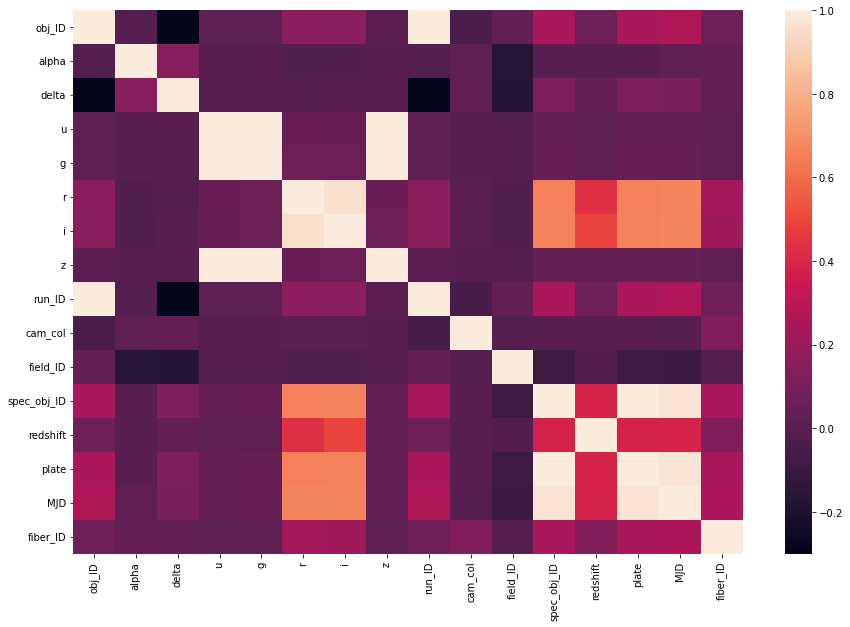

In [8]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr())

In [9]:
df.rename(columns={"class":"classes"}, inplace=True)

In [10]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,classes,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [11]:
df["classes"].value_counts(normalize=True)

GALAXY    0.59445
STAR      0.21594
QSO       0.18961
Name: classes, dtype: float64

<AxesSubplot:>

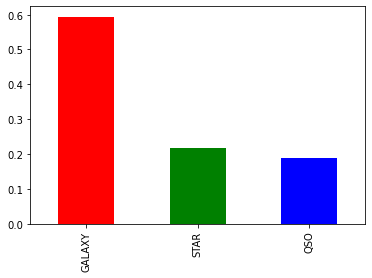

In [12]:
df["classes"].value_counts(normalize=True).plot.bar(color=['red', 'green',"blue"])

In [18]:
df['classes'] = df.classes.replace('GALAXY',0).replace('STAR',1).replace('QSO',2).astype(np.int64)

In [19]:
data = df.copy()

In [20]:
feature_cols = [x for x in data.columns if x not in 'classes']
correlations = df[feature_cols].corrwith(df["classes"])
print(correlations.map(abs).sort_values())


obj_ID         0.000047
run_ID         0.000049
alpha          0.004552
g              0.005915
cam_col        0.014476
z              0.017352
u              0.017701
fiber_ID       0.032053
field_ID       0.038044
delta          0.056643
r              0.150691
MJD            0.207262
spec_obj_ID    0.215722
plate          0.215722
i              0.284396
redshift       0.536822
dtype: float64


In [21]:
fields = correlations.map(abs).sort_values().iloc[-4:].index
print(fields)

Index(['spec_obj_ID', 'plate', 'i', 'redshift'], dtype='object')


In [22]:
feature_cols = [x for x in df.columns if x not in 'classes']

from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(df[feature_cols], df['classes']))

# Create the data sets
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'classes']

X_test = df.loc[test_idx, feature_cols]
y_test = df.loc[test_idx, 'classes']

In [23]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler

In [24]:
data = df.copy()

In [25]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,classes,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,0,0.116123,6121,56187,842


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts with 1000 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['classes']))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'classes']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'classes']

In [27]:
X = data[feature_cols]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in feature_cols])
print(X.columns)

Index(['obj_ID_scaled', 'alpha_scaled', 'delta_scaled', 'u_scaled', 'g_scaled',
       'r_scaled', 'i_scaled', 'z_scaled', 'run_ID_scaled', 'cam_col_scaled',
       'field_ID_scaled', 'spec_obj_ID_scaled', 'redshift_scaled',
       'plate_scaled', 'MJD_scaled', 'fiber_ID_scaled'],
      dtype='object')


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

y= data["classes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred, average='micro'), 2))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     23733
           1       0.86      0.67      0.75      8641
           2       0.91      0.74      0.82      7626

    accuracy                           0.85     40000
   macro avg       0.87      0.79      0.82     40000
weighted avg       0.85      0.85      0.84     40000

Accuracy score:  0.85
F1 Score:  0.85


In [31]:
feature_cols = [x for x in df.columns if x not in 'classes']

from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(df[feature_cols], df['classes']))

# Create the data sets
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'classes']

X_test = df.loc[test_idx, feature_cols]
y_test = df.loc[test_idx, 'classes']

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70000, 16), (70000,), (30000, 16), (30000,))

In [33]:
from sklearn.utils import resample
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
model = RandomForestClassifier()
model.get_params().keys()

param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [36]:
search.best_score_

0.9775571428571428

In [37]:
search.best_params_

{'max_depth': 19, 'max_features': 'log2', 'n_estimators': 31}

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()


tree_list = [15, 25, 50, 100, 200, 300]
for n_trees in tree_list:
    

    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)

    
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 300 trees


,error
n_trees,
15.0,0.032867
25.0,0.029167
50.0,0.024133
100.0,0.022900
200.0,0.022167
300.0,0.022600


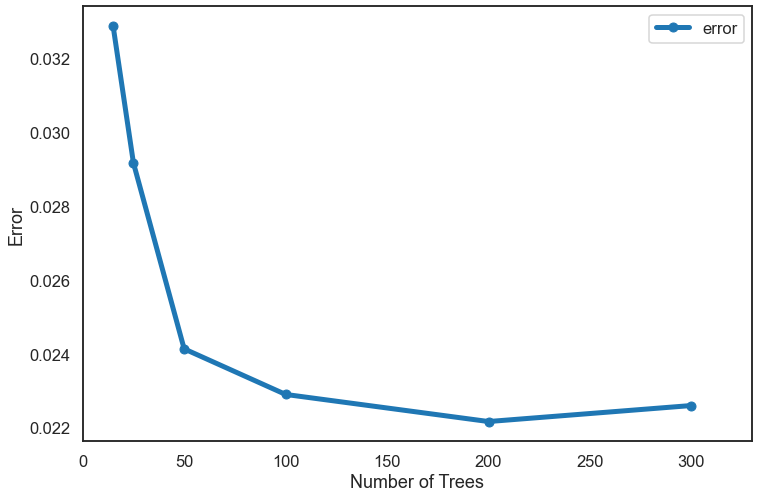

In [39]:
sns.set_context('talk')
sns.set_style('white')


ax = error_df.plot(marker='o', figsize=(12, 8), linewidth=5)


ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);

In [40]:
from sklearn.model_selection import GridSearchCV

tree_list = [15, 25, 50, 100, 200, 400, 450, 500]
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4, 5, 6]}


GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)


GV_GBC = GV_GBC.fit(X_train, y_train)

In [41]:
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42)

In [42]:
from sklearn.metrics import classification_report

y_pred = GV_GBC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     18019
           1       1.00      1.00      1.00      6496
           2       0.93      0.96      0.95      5485

    accuracy                           0.98     30000
   macro avg       0.97      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



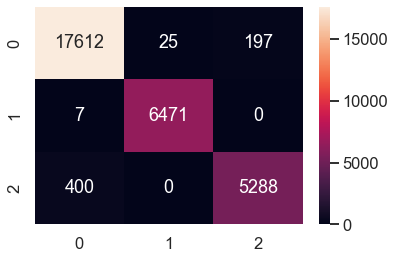

In [43]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')